|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:330px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="300"/></div>|<div style="width:330px"><img src="https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg" width="300"/></div>|
|---|---|--:|



# Linear elasticity: disc with a hole

In this benchmark example we consider a linear elastic small deformation problem. More specifically, a plate with a central hole that is put under tension on its top boundary is simulated. By exploiting symmetries, below we evaluate this problem just for the top right quarter of this disc. 

Doing this it is important to define boundary conditions for the regarded section of the plate. For the bottom boundary ($x$-axis, $\theta=-90°$) and the left boundary ($y$-axis, $\theta=0°$) we prescribe Dirichlet boundary conditions that constrain the normal displacement along the edge to be zero. On the top, where a tensile traction is applied to the plate, Neumann boundary conditions are prescribed.

For the description of the plate and its load, some dimensions need to be defined. The quarter disc under consideration can be seen as a square with an edge length of $10\, \text{cm}$. The radius of the circular hole is $a = 2\, \text{cm}$ and the applied tension on the top boundary has a value of $\sigma = 10\, \text{MPa}$. 

To fully capture and understand the behaviour of stress and strain distributions around the hole, it is necessary to also define material properties. In case of isotropic linear elasticity, the relevant parameters are the Young's modulus and Poisson's ratio. The following parameters are chosen here:

$ E = 1\,\text{MPa} \qquad \nu = 0.3$

For verification of the numerical implementation, the numerical solution of the problem will be compared to the analytical solution.



## Analytical solution

The overall stress distributions in the plate around the hole can be represented by Kirsch's Solution, which is expressed here in cylindrical coordinates. The following equations are valid for an infinitely extended plate. Since the hole is very small compared to the dimension of the plate, we can consider this specification as rendered. The parameter $\sigma$ stands for the applied tension whereas $a$ identifies the radius of the inner hole. $r$ and $\theta$ are the cylindrical coordinates and describe the distance of a point to the centre of the hole ($r$) and the angle ($\theta$) under which it is deflected with respect to the axis along which the traction is applied.

\begin{align}
    \sigma_{rr} \left( r , \theta \right) &=
    \frac{\sigma}{2}
    \left[ \left( 1 - \frac{a^2}{r^2} \right) + \left( 1 + 3 \frac{a^4}{r^4} - 4 \frac{a^2}{r^2} \right) \cos \left( 2 \theta \right) \right]
\\
    \sigma_{\theta \theta} \left( r , \theta \right) &=
    \frac{\sigma}{2}
    \left[ \left( 1 + \frac{a^2}{r^2} \right) - \left( 1 + 3 \frac{a^4}{r^4} \right) \cos \left( 2 \theta \right) \right]
\\
    \sigma_{r \theta} \left( r , \theta \right) &=
    - \frac{\sigma}{2}
    \left[ \left( 1 - 3 \frac{a^4}{r^4} + 2 \frac{a^2}{r^2} \right) \sin \left( 2 \theta \right) \right]
\end{align}

In the chosen OGS model, the traction is applied as mentioned before on the top boundary of the plate along the $y$-axis, so the $x$-axis is at $\theta = -90°$.

To visualise the problem, we plot the stress distribution along the $x$- and $y$-axes as well as along the diagonal ($\theta = -45°$).

As we can see below, the cavity causes characteristic stress distributions. We now want to take a closer look at those along the $x$-axis. For larger distances from the hole, the stresses are approximately distributed as if the plate was continuous. As the hole is approached, the tangential stress is increasing until it reaches its maximum value directly at the contour. Interestingly, that value is three times higher than the applied traction. It can be concluded, that the hole leads to a threefold stress concentration in the plate. 

In [629]:
#HIDDEN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#Some plot settings
plt.style.use('seaborn-deep')
plt.rcParams['lines.linewidth']= 2.0
plt.rcParams['lines.color']= 'black'
plt.rcParams['legend.frameon']=True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize']=14
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['figure.figsize'] = (8, 6)

In [630]:
#HIDDEN
def kirsch_sig_rr(sig,r,theta,a):
    return 0.5*sig*((1-a**2/r**2)+(1+3*np.power(a,4)/np.power(r,4)-4*a**2/r**2)*np.cos(2*np.pi*theta/180)) * np.heaviside(r-a,1) 
    
def kirsch_sig_tt(sig,r,theta,a):
    return 0.5*sig*((1+a**2/r**2)-(1+3*np.power(a,4)/np.power(r,4))*np.cos(2*np.pi*theta/180)) * np.heaviside(r-a,1)

def kirsch_sig_rt(sig,r,theta,a):
    return -0.5*sig*((1-3*np.power(a,4)/np.power(r,4)+2*a**2/r**2)*np.sin(2*np.pi*theta/180)) * np.heaviside(r-a,1)

### Stress distribution along the $x$-axis ($\theta= -90°$, orthogonal to the load)

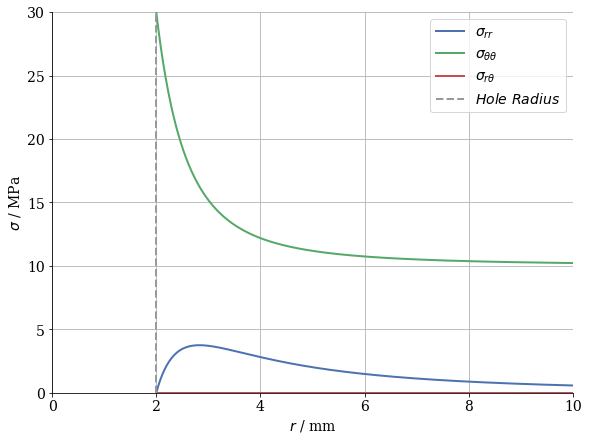

In [631]:
r = np.linspace(2,10,1000)
plt.plot(r, kirsch_sig_rr(10,r,-90,2), label = "$\sigma_{rr}$")
plt.plot(r, kirsch_sig_tt(10,r,-90,2), label = "$\sigma_{\\theta \\theta}$")
plt.plot(r, kirsch_sig_rt(10,r,-90,2), label = "$\sigma_{r \\theta}$")
plt.plot([2,2], [0,30], color="0.6", linestyle = "--", label = "$Hole\ Radius$")
plt.legend(loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.xlabel('$r$ / mm')
plt.xlim(0,10)
plt.ylabel('$\\sigma$ / MPa')
plt.ylim(0,30);

### Stress distribution along the diagonal ($\theta= -45°$)

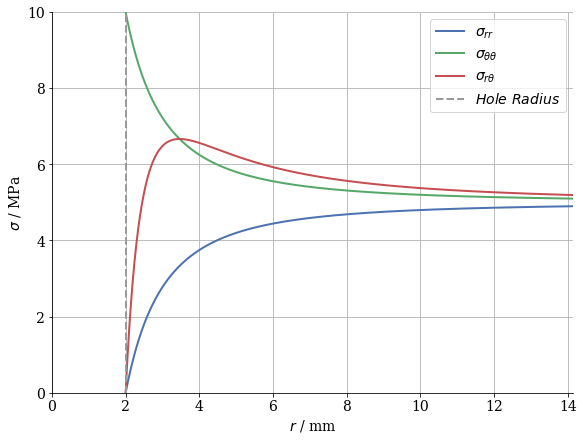

In [632]:
r = np.linspace(2,14.14,1000)
plt.plot(r, kirsch_sig_rr(10,r,-45,2), label = "$\sigma_{rr}$")
plt.plot(r, kirsch_sig_tt(10,r,-45,2), label = "$\sigma_{\\theta \\theta}$")
plt.plot(r, kirsch_sig_rt(10,r,-45,2), label = "$\sigma_{r \\theta}$")
plt.plot([2,2], [0,10], color="0.6", linestyle = "--", label = "$Hole\ Radius$")
plt.legend(loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.xlabel('$r$ / mm')
plt.xlim(0,14.14)
plt.ylabel('$\\sigma$ / MPa')
plt.ylim(0,10);

### Stress distribution along the $y$-axis ($\theta=0°$, parallel to the applied tension)

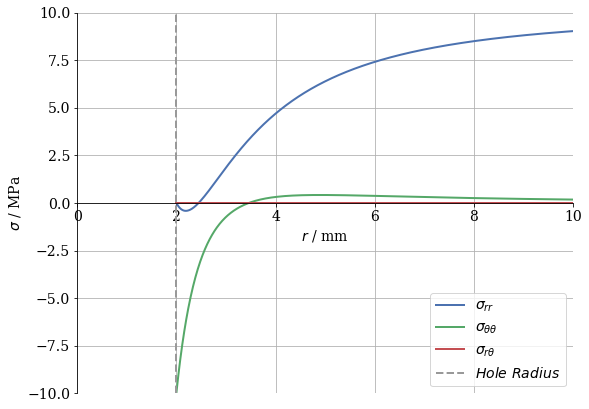

In [633]:
r = np.linspace(2,10,1000)
plt.plot(r, kirsch_sig_rr(10,r,0,2), label = "$\sigma_{rr}$")
plt.plot(r, kirsch_sig_tt(10,r,0,2), label = "$\sigma_{\\theta \\theta}$")
plt.plot(r, kirsch_sig_rt(10,r,0,2), label = "$\sigma_{r \\theta}$")
plt.plot([2,2], [-10,10], color="0.6", linestyle = "--", label = "$Hole\ Radius$")
plt.legend(loc="lower right")
plt.tight_layout()
plt.grid(True)
ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.xlabel('$r$ / mm')
plt.xlim(0,10)
plt.ylabel('$\\sigma$ / MPa')
plt.ylim(-10,10); 

In [634]:
cart_to_cyl = lambda x,y: [np.sqrt(x**2+y**2), np.rad2deg(np.arctan(x/y))]

In [635]:
X, Y = np.meshgrid(np.linspace(.1,10,1000),np.linspace(0.1,10,1000))

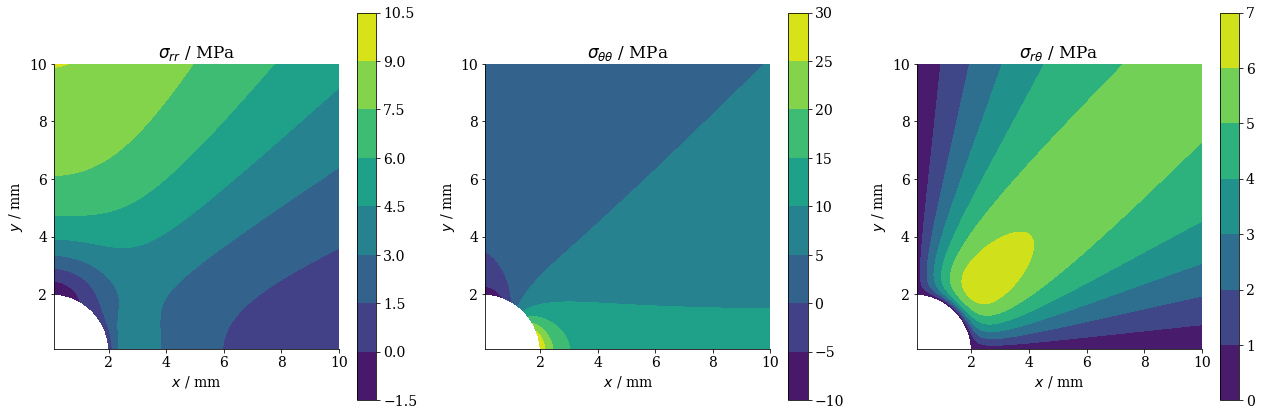

In [636]:
#cylindical coordinates from Cartesian grid
r, theta = cart_to_cyl(X,Y)
eps = 1e-2

fig, ax = plt.subplots(ncols=3,figsize=(18,6))
l1=ax[0].contourf(X,Y,np.ma.masked_array(kirsch_sig_rr(10,r,-theta,2),mask=r<2))
l2=ax[1].contourf(X,Y,np.ma.masked_array(kirsch_sig_tt(10,r,-theta,2),mask=r<2))
l3=ax[2].contourf(X,Y,np.ma.masked_array(kirsch_sig_rt(10,r,-theta,2),mask=r<2))
fig.colorbar(l1,ax=ax[0])
fig.colorbar(l2,ax=ax[1])
fig.colorbar(l3,ax=ax[2])
for i in range(3):
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('$x$ / mm')
    ax[i].set_ylabel('$y$ / mm')
ax[0].set_title('$\\sigma_{rr}$ / MPa')
ax[1].set_title('$\\sigma_{\\theta\\theta}$ / MPa')
ax[2].set_title('$\\sigma_{r\\theta}$ / MPa')
fig.tight_layout();

**ToDo**

* add missing information (geometry, parameters) 
* check consistency of units (e.g. mm, N, s, MPa=N/mm²)
* maybe we can use contour plots to show point-wise difference to numerical result
* confirm whether $x$ is at $+$ or $-90°$

# Numerical solution

In [637]:
from ogs6py import ogs

In [638]:
model=ogs.OGS(INPUT_FILE="../disc_with_hole.prj", PROJECT_FILE="../disc_with_hole.prj")

In [639]:
model.run_model(logfile="out.txt")

OGS finished with project file ../disc_with_hole.prj.
Execution took 0.7018649578094482 s


In [640]:
import pyvista as pv
pv.set_plot_theme("document")
pv.set_jupyter_backend("static") # comment out for interactive graphics


In [641]:
reader = pv.get_reader("disc_with_hole.pvd")
reader.set_active_time_value(1.0) # go to 1 s
mesh = reader.read()[0] # nulltes Gitter lesen

In [642]:
plotter = pv.Plotter()

plotter.add_mesh(mesh, scalars="displacement", show_edges=True, show_scalar_bar=True)
plotter.show_bounds(ticks="outside")
plotter.add_axes()
plotter.view_xy()
#plotter.show()
#plotter.show(jupyter_backend="static")

In [643]:
def vec4_to_mat3x3cart(vec4):
    theta = np.arctan2(ys, xs)
    
    m = np.zeros((3,3))
    m[0,0] = vec4[0]
    m[1,1] = vec4[1]
    m[2,2] = vec4[2]
    m[0,1] = vec4[3]
    m[1,0] = vec4[3]
    
    return np.matrix(m)

def vec4_to_mat3x3polar(vec4, xs, ys):     # Fkt wandelt Kelvin Darstellung (von ogs ausgegeben) in Tensor um
    
    m_cart = vec4_to_mat3x3cart(vec4)
    
    theta = np.arctan2(ys, xs)

    rot = np.matrix(np.eye(3))  # 3x3 Einheitsmatrix
    rot[0,0] = np.cos(theta)
    rot[0,1] = -np.sin(theta)
    rot[1,0] = np.sin(theta)
    rot[1,1] = np.cos(theta)  # rot = Drehmatrix, Drehung um z-Achse
    
    return rot.T * m_cart * rot

### Stress distribution along the x-axis ($\theta = -90°$)

In [644]:
pt1 = (0,1e-6,0)
pt2= (10,1e-6,0)
xaxis = pv.Line(pt1, pt2, resolution = 2)
line_mesh = mesh.slice_along_line(xaxis)

xs = line_mesh.points[:,0]    # x (0) coordinate of each point (Spalte 0)
ys = line_mesh.points[:,1]    # y Koordinate jedes Punktes (Spalte 1)
dist_from_origin = np.hypot(xs, ys)   # Abstand vom Ursprung (= Radius)
indices_sorted = np.argsort(dist_from_origin)    # Indizes der Punkte sortieren nach ihrem Abstand vom Ursprung
dist_sorted = dist_from_origin[indices_sorted]   # index magic

In [645]:
sig = line_mesh.point_data["sigma"]

In [646]:
num_points = sig.shape[0]        # entspricht len(sig) d.h Anzahl der Punkte, hier 36
sig_rr = np.zeros(num_points)    # Liste von 36 Nullen
sig_tt = np.zeros(num_points)
sig_rt = np.zeros(num_points)

In [647]:
for pt_idx in range(num_points):
    sig_vec = sig[pt_idx, :]
    xs = line_mesh.points[pt_idx,0]
    ys = line_mesh.points[pt_idx,1]
    sig_polar = vec4_to_mat3x3polar(sig_vec, xs, ys)
    sig_rr[pt_idx] = sig_polar[0,0]
    sig_tt[pt_idx] = sig_polar[1,1]
    sig_rt[pt_idx] = sig_polar[0,1]

(-2.0, 35.0)

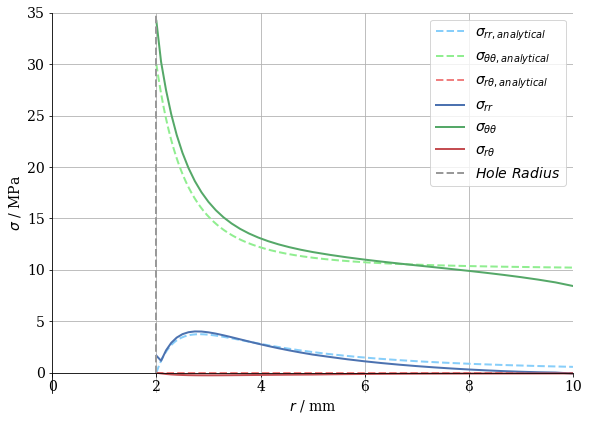

In [648]:
sig_rr_sorted = sig_rr[indices_sorted]
sig_tt_sorted = sig_tt[indices_sorted]
sig_rt_sorted = sig_rt[indices_sorted]
r = np.linspace(2,10,1000)

plt.plot(r, kirsch_sig_rr(10,r,-90,2), color = "lightskyblue", linestyle = "--", label = "$\sigma_{rr,analytical}$")
plt.plot(r, kirsch_sig_tt(10,r,-90,2), color = "lightgreen", linestyle = "--", label = "$\sigma_{\\theta\\theta,analytical}$")
plt.plot(r, kirsch_sig_rt(10,r,-90,2), color = "lightcoral", linestyle = "--", label = "$\sigma_{r\\theta,analytical}$")

plt.plot(dist_sorted, sig_rr*1000, label = "$\sigma_{rr}$")
plt.plot(dist_sorted, sig_tt_sorted*1000, label = "$\sigma_{\\theta\\theta}$")
plt.plot(dist_sorted, -sig_rt_sorted*1000, label = "$\sigma_{r\\theta}$")
plt.plot([2,2], [0, 35], color="0.6", linestyle = "--", label = "$Hole\ Radius$")

plt.tight_layout()
plt.grid(True)
plt.xlabel('$r$ / mm')
plt.ylabel('$\\sigma$ / MPa')
plt.legend(loc="upper right")
ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.xlim(0,10)
plt.ylim(-2,35)


### Stress distribution along the diagonal ($\theta = 45°$)

In [649]:
pt1 = (0,0,0)
pt2 = (10,10,0)
diagonal = pv.Line(pt1, pt2, resolution=2)    # erstellt Linie zwischen den Punkten und teilt sie in 2 Teile (resolution)
line_mesh = mesh.slice_along_line(diagonal)   # Schnitt durch das Gitter entlang der Linie (ergibt 1D Gitter mit 35 Zellen und 36 Punkten)

xs = line_mesh.points[:,0]    # x (0) coordinate of each point (Spalte 0)
ys = line_mesh.points[:,1]    # y Koordinate jedes Punktes (Spalte 1)
dist_from_origin = np.hypot(xs, ys)   # Abstand vom Ursprung (Radius)
indices_sorted = np.argsort(dist_from_origin)    # Indizes der Punkte sortieren nach ihrem Abstand vom Ursprung
dist_sorted = dist_from_origin[indices_sorted]   # index magic


In [650]:
sig = line_mesh.point_data["sigma"] # Spannung in Kelvin Darstellung als 4 zeiliger Vector statt 3x3 Matrix
# Achtung (CL): Das ist nicht ganz die Kelvin-Darstellung. Die Kelvin-Darstellung hat noch Faktoren sqrt(2) bei den Nichtdiagonalelementen.

In [651]:
num_points = sig.shape[0]        # entspricht len(sig) d.h Anzahl der Punkte, hier 36
sig_rr = np.zeros(num_points)    # Liste von 36 Nullen
sig_tt = np.zeros(num_points)
sig_rt = np.zeros(num_points)

In [652]:
for pt_idx in range(num_points):
    sig_vec = sig[pt_idx, :]
    xs = line_mesh.points[pt_idx,0]
    ys = line_mesh.points[pt_idx,1]
    sig_polar = vec4_to_mat3x3polar(sig_vec, xs, ys)
    sig_rr[pt_idx] = sig_polar[0,0]
    sig_tt[pt_idx] = sig_polar[1,1]
    sig_rt[pt_idx] = sig_polar[0,1]

(0.0, 10.5)

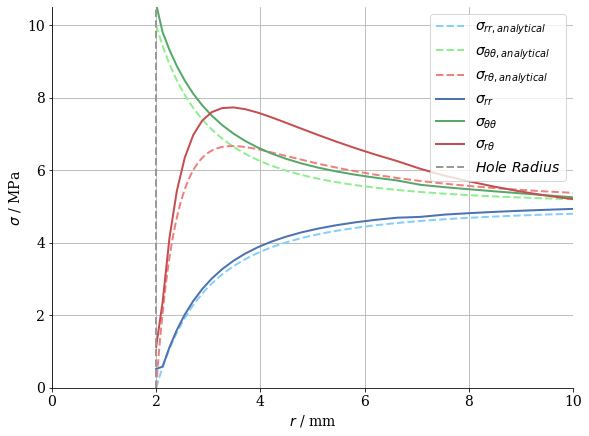

In [653]:
sig_rr_sorted = sig_rr[indices_sorted]
sig_tt_sorted = sig_tt[indices_sorted]
sig_rt_sorted = sig_rt[indices_sorted]

r = np.linspace(2,14.14,1000)

plt.plot(r, kirsch_sig_rr(10,r,-45,2), color = "lightskyblue", linestyle = "--", label = "$\sigma_{rr,analytical}$")
plt.plot(r, kirsch_sig_tt(10,r,-45,2), color = "lightgreen", linestyle = "--", label = "$\sigma_{\\theta\\theta,analytical}$")
plt.plot(r, kirsch_sig_rt(10,r,-45,2), color = "lightcoral", linestyle = "--", label = "$\sigma_{r\\theta,analytical}$")

plt.plot(dist_sorted, sig_rr_sorted*1000, label = "$\sigma_{rr}$")
plt.plot(dist_sorted, sig_tt_sorted*1000, label = "$\sigma_{\\theta\\theta}$")
plt.plot(dist_sorted, sig_rt_sorted*1000, label = "$\sigma_{r\\theta}$")
plt.axvline(2, color="0.6", linestyle = "--", label = "$Hole\ Radius$")

plt.legend(loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.xlabel('$r$ / mm')
plt.xlim(0,10)
plt.ylabel('$\\sigma$ / MPa')
plt.ylim(0,10.5)

### Stress distribution along the $y$-axis ($\theta=0°$)

In [654]:
pt1 = (0,0,0)
pt2 = (0,10,0)
yaxis = pv.Line(pt1, pt2, resolution=2)
line_mesh = mesh.slice_along_line(yaxis)

xs = line_mesh.points[:,0]
ys = line_mesh.points[:,1]
dist_from_origin = np.hypot(xs, ys)
indices_sorted = np.argsort(dist_from_origin)
dist_sorted = dist_from_origin[indices_sorted]   

In [655]:
sig = line_mesh.point_data["sigma"]

In [656]:
num_points = sig.shape[0]
sig_rr = np.zeros(num_points)
sig_tt = np.zeros(num_points)
sig_rt = np.zeros(num_points)

In [657]:
for pt_idx in range(num_points):
    sig_vec = sig[pt_idx, :]
    xs = line_mesh.points[pt_idx,0]
    ys = line_mesh.points[pt_idx,1]
    sig_polar = vec4_to_mat3x3polar(sig_vec, xs, ys)
    sig_rr[pt_idx] = sig_polar[0,0]
    sig_tt[pt_idx] = sig_polar[1,1]
    sig_rt[pt_idx] = sig_polar[0,1]

(-10.5, 10.5)

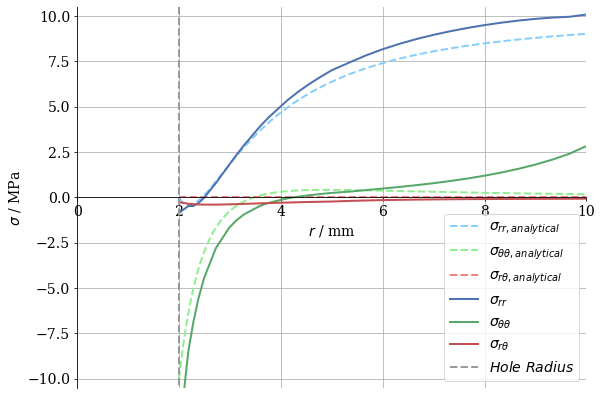

In [658]:
sig_rr_sorted = sig_rr[indices_sorted]
sig_tt_sorted = sig_tt[indices_sorted]
sig_rt_sorted = sig_rt[indices_sorted]

r = np.linspace(2,10,1000)

plt.plot(r, kirsch_sig_rr(10,r,0,2), color = "lightskyblue", linestyle = "--", label = "$\sigma_{rr,analytical}$")
plt.plot(r, kirsch_sig_tt(10,r,0,2), color = "lightgreen", linestyle = "--", label = "$\sigma_{\\theta\\theta,analytical}$") 
plt.plot(r, kirsch_sig_rt(10,r,0,2), color = "lightcoral", linestyle = "--", label = "$\sigma_{r\\theta,analytical}$")

plt.plot(dist_sorted, sig_rr_sorted*1000, label = "$\sigma_{rr}$")
plt.plot(dist_sorted, sig_tt_sorted*1000, label = "$\sigma_{\\theta\\theta}$")
plt.plot(dist_sorted, -sig_rt_sorted*1000, label = "$\sigma_{r\\theta}$")
plt.plot([2,2], [-12, 12], color="0.6", linestyle = "--", label = "$Hole\ Radius$")

plt.legend(loc="lower right")
plt.tight_layout()
plt.grid(True)
ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.xlabel('$r$ / mm')
plt.xlim(0,10)
plt.ylabel('$\\sigma$ / MPa')
plt.ylim(-10.5,10.5) 

In [659]:
points = mesh.point_data["sigma"].shape[0]

In [660]:
sig_polar = np.zeros([points,3,3])
sig_rr = np.zeros([points,1])
sig_tt = np.zeros([points,1])
sig_rt = np.zeros([points,1])

In [661]:
xs = mesh.points[:,0]
ys = mesh.points[:,1]
sig_vec = mesh.point_data["sigma"]
for i in range (xs.shape[0]):
    sig_polar[i] = vec4_to_mat3x3polar(sig_vec[i,:], xs[i], ys[i])
    sig_rr[i] = sig_polar[i,0,0]
    sig_tt[i] = sig_polar[i,1,1]
    sig_rt[i] = sig_polar[i,0,1]

In [662]:
mesh

UnstructuredGrid (0x7fa203c15040)
  N Cells:	1275
  N Points:	1356
  X Bounds:	0.000e+00, 1.000e+01
  Y Bounds:	0.000e+00, 1.000e+01
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	12

-0.0008514403651368969 0.010086895902004121


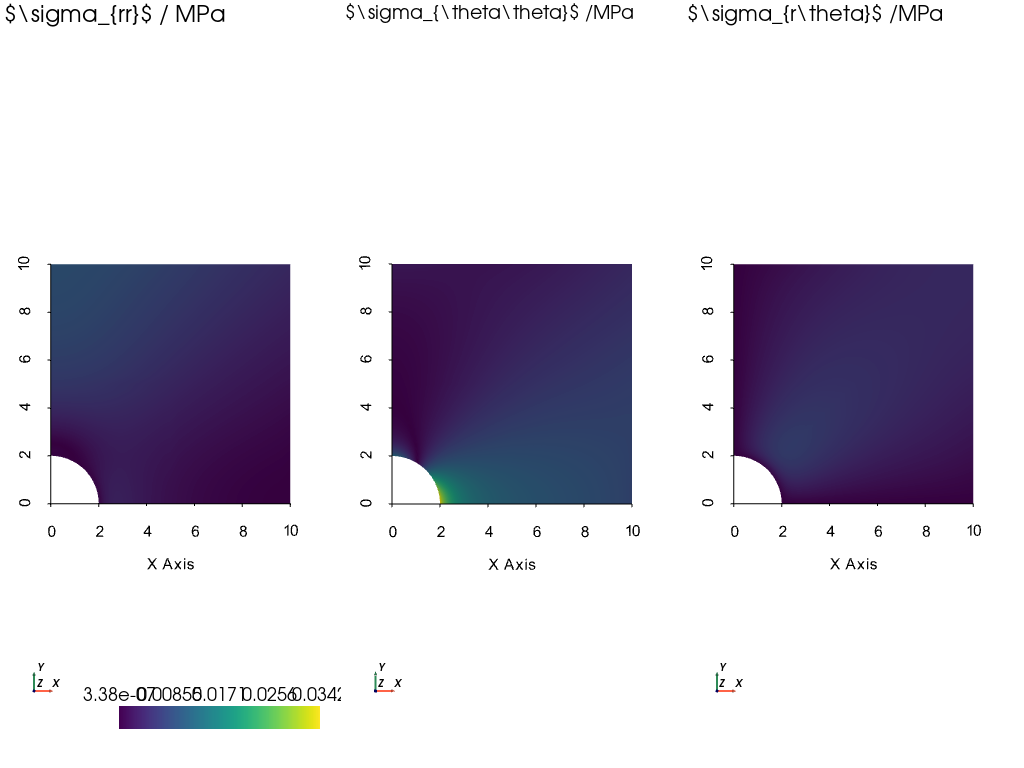

In [663]:
print(np.min(sig_rr), np.max(sig_rr))

mesh2 = mesh.copy(deep=False) # das ist die Lösung!
mesh3 = mesh.copy(deep=False)

p = pv.Plotter(shape=(1, 3), border=False)
p.subplot(0,0)
p.add_text('$\sigma_{rr}$ / MPa', font_size = 15)
p.add_mesh(mesh, scalars = sig_rr, show_edges=False, show_scalar_bar=True)  #, colormap="YlOrRd", clim=[-1e-2, 1e-2])
p.show_bounds(ticks="outside")
p.add_axes()
p.view_xy()

p.subplot(0,1)
p.add_text("$\sigma_{\\theta\\theta}$ /MPa", font_size = 15)
p.add_mesh(mesh2, scalars = sig_tt, show_edges=False, show_scalar_bar=True)
p.show_bounds(ticks="outside")
p.add_axes()
p.view_xy()

p.subplot(0,2)
p.add_text("$\sigma_{r\\theta}$ /MPa", font_size = 15)
p.add_mesh(mesh3, scalars = sig_rt, show_edges=False, show_scalar_bar=True)
p.show_bounds(ticks="outside")
p.add_axes()
p.view_xy()

p.show()

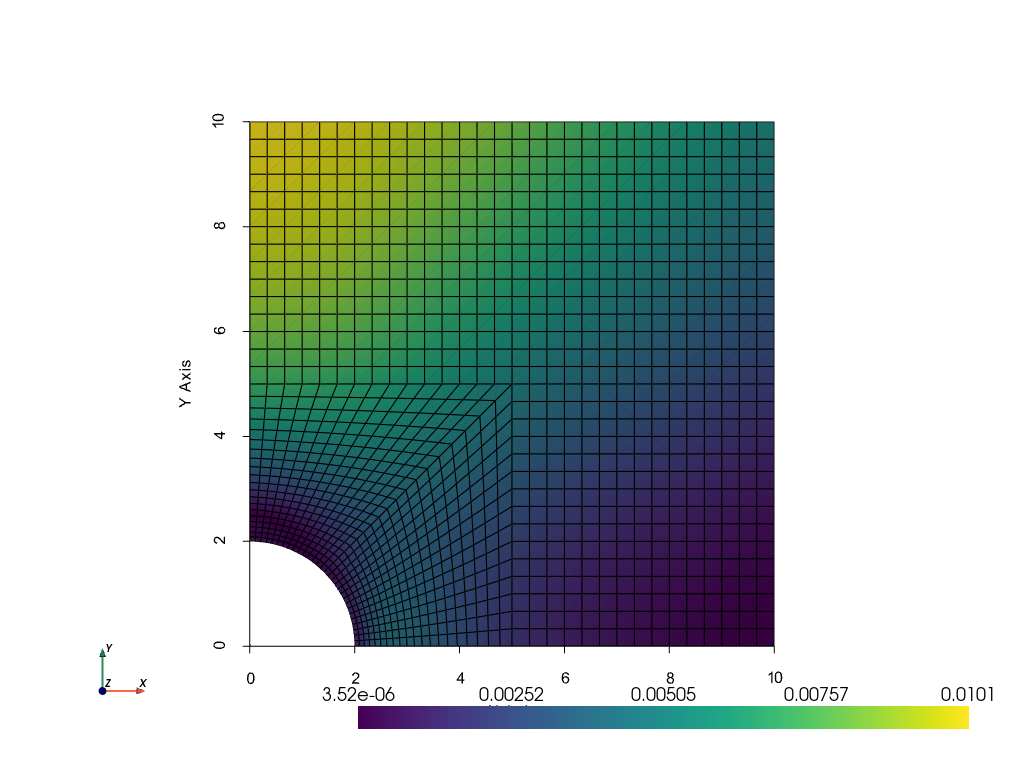

In [664]:
plotter = pv.Plotter()

plotter.add_mesh(mesh, scalars = sig_rr, show_edges=True, show_scalar_bar=True)
plotter.show_bounds(ticks="outside")
plotter.add_axes()
plotter.view_xy()
plotter.show()

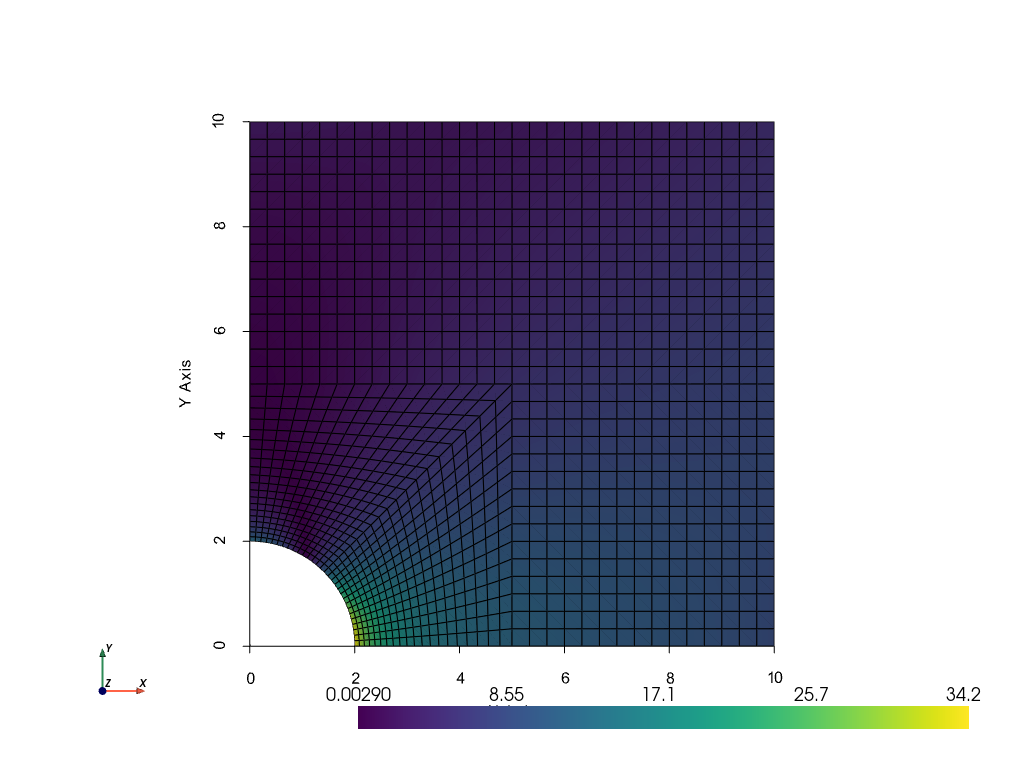

In [665]:
plotter = pv.Plotter()

plotter.add_mesh(mesh, scalars = sig_tt*1000, show_edges=True, show_scalar_bar=True)
plotter.show_bounds(ticks="outside")
plotter.add_axes()
plotter.view_xy()
plotter.show()

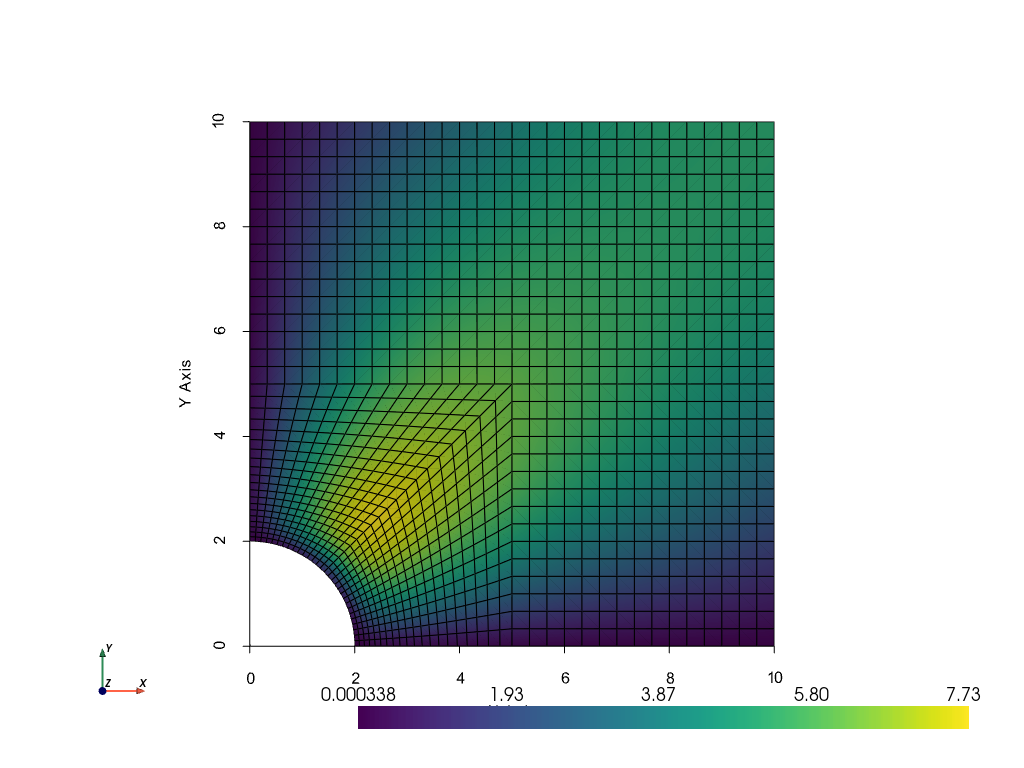

In [666]:
plotter = pv.Plotter()

plotter.add_mesh(mesh, scalars = sig_rt*1000, show_edges=True, show_scalar_bar=True)
plotter.show_bounds(ticks="outside")
plotter.add_axes()
plotter.view_xy()
plotter.show()